In [1]:
import csv
import numpy as np

# Create an empty list to store the 'Age' values
R20_r = []
DeltaT_r = []
# sigma_v = []
Ia_r = []
Vt_r = []

# Open the CSV file
with open('test_1_rotor_result_data.csv', mode='r') as file:
    # Create a CSV DictReader object
    csv_dict_reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_dict_reader:
        # Extract the 'Age' value and append it to the list
        R20_r.append(np.float32(row['R20']))
        DeltaT_r.append(np.float32(row['delta_t']))
#         sigma_v.append(np.float32(row['sigma']))
        
# Open the CSV file
with open('DC_test_rotor_data.csv', mode='r') as file:
    # Create a CSV DictReader object
    csv_dict_reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_dict_reader:
        # Extract the 'Age' value and append it to the list
        Ia_r.append(np.float32(row['i_r']))
        Vt_r.append(np.float32(row['v_r']))

In [185]:
alpha = 0.00394
sigma_v = 0.018
sigma_i = 0.0051

def generate_v_pred(R_20, Delta_T, alpha_, Sigma_V, I_r):
    num_samples = len(R_20)
    num_exp = len(I_r)
    V_pred = np.empty((num_exp, num_samples))

    for i in range(num_samples):
        I_sampling = np.random.normal(I_r,sigma_i)
        mean = R_20[i] * (1 + alpha_ * Delta_T[i]) * np.array(I_sampling)
        V_pred[:, i] = np.random.normal(mean, Sigma_V, num_exp)

    return V_pred

I = np.linspace(min(Ia_r),max(Ia_r)+0.25,100)
V_pred = generate_v_pred(R20_r, DeltaT_r, alpha, sigma_v, I)

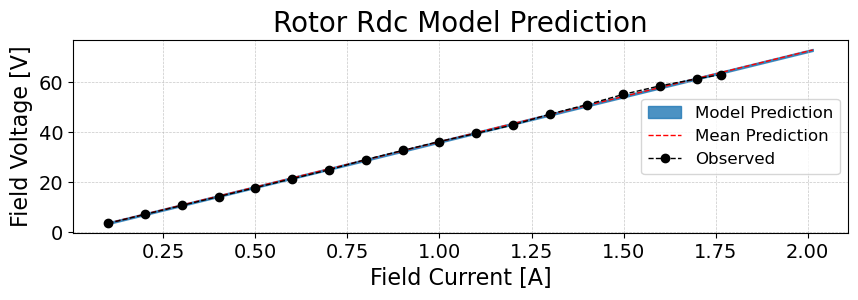

In [187]:
# import time
# import matplotlib.pyplot as plt
# import arviz as az

# t = time.time()

# # Create a figure with a custom size (width=10 inches, height=5 inches)
# plt.figure(figsize=(10, 2.5))

# # for i in range(len(R20_r)):
# #     plt.plot(np.sort(I),np.sort(V_pred[:,i]), color='C0', alpha=0.1)
# # plt.plot([],[], label=f'Rotor Rdc Model Prediction', color='C0', alpha=0.3) 
# az.plot_hdi(I,V_pred.T,fill_kwargs={"alpha": 0.8, "color": 'C0', "label": "Model Prediction"},)
# plt.plot(np.sort(I),np.sort(np.mean(V_pred, axis=1)), color='r', lw=1, linestyle='--', label='Mean Prediction')
# plt.plot(np.sort(Ia_r),np.sort(Vt_r),linestyle='--', marker='o', color='k', lw=1, label='Observed')

# # Set the title and labels
# plt.title('Rotor Rdc Model Prediction', fontsize=20)
# plt.xlabel('Field Current [A]', fontsize=16) 
# plt.ylabel('Field Voltage [V]', fontsize=16)

# # Set the tick label font size for both x and y axes
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# # Add a legend
# plt.legend(fontsize=12,loc='center right')

# # Add a grid
# plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# plt.savefig('Rotor_RDC_pred.png', format='png', dpi=1000, bbox_inches="tight")

# # Show the plot
# plt.show()

# elapsed = time.time() - t

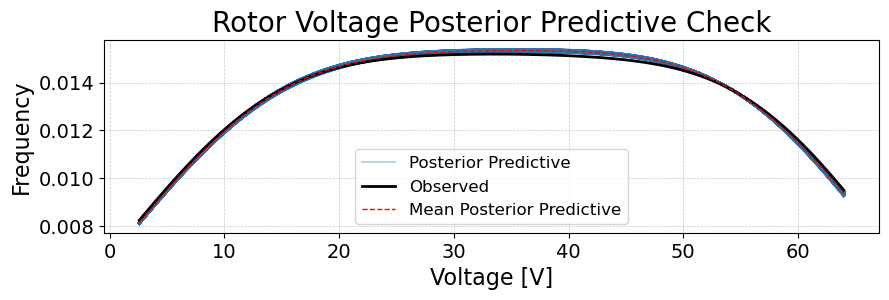

In [93]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde

# def ppc_dens_overlay_manual(V_r, V_pred_orig,n_pred):
#     # Choose n random indices from the V_pred array
#     random_indices = np.random.choice(V_pred_orig.shape[1], size=n_pred, replace=False)

#     # Select 50 columns from V_pred using the random indices
#     V_pred = V_pred_orig[:, random_indices]
    
#     # Calculate density estimates for observed data
#     kde_obs = gaussian_kde(V_r)

#     # Calculate density estimates for each column of V_pred
#     kde_preds = [gaussian_kde(V_pred[:, i]) for i in range(V_pred.shape[1])]

#     # Define the x-axis range for the plot
#     x = np.linspace(np.min(V_r) - 1, np.max(V_r) + 1, 1000)
    
#     # Create a figure with a custom size (width=10 inches, height=5 inches)
#     plt.figure(figsize=(10, 2.5))
# #     plt.figure(figsize=(19.20, 10.80*0.25))

#     # Plot the density lines for each of the posterior predictive samples
#     for i, kde_pred in enumerate(kde_preds):
#         plt.plot(x, kde_pred(x), color='C0', alpha=0.3, label=f'Posterior Predictive' if i == 0 else '')
    
#     # Plot the density line for the observed data
#     plt.plot(x, kde_obs(x), color='k', lw=2, label='Observed')
    
#     # Calculate and plot the mean of the posterior predictive checks
#     mean_posterior_predictive = np.mean(V_pred, axis=1)
#     kde_mean_posterior_predictive = gaussian_kde(mean_posterior_predictive)
#     plt.plot(x, kde_mean_posterior_predictive(x), color='r', lw=1, linestyle='--', label='Mean Posterior Predictive')

#     # Set the title and labels
#     plt.title('Rotor Voltage Posterior Predictive Check', fontsize=20)
#     plt.xlabel('Voltage [V]', fontsize=16) 
#     plt.ylabel('Frequency', fontsize=16)
              
#     # Set the tick label font size for both x and y axes
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
              
#     # Add a legend
#     plt.legend(fontsize=12)

#     # Add a grid
#     plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

#     # Save the plot as an SVG file
# #     plt.savefig('PPC_Rotor_Voltage.svg', format='svg')
#     plt.savefig('PPC_Rotor_Voltage.png', format='png', dpi=1000, bbox_inches="tight")


#     # Show the plot
#     plt.show()

# # PPC:
# n_pred = 10000
# ppc_dens_overlay_manual(Vt_r, V_pred, n_pred)


In [188]:
def generate_v_pred(R_20, Delta_T, alpha_, Sigma_V, I_r):
    num_samples = len(R_20)
    num_exp = len(I_r)
    V_pred = np.empty((num_exp, num_samples))

    for i in range(num_samples):
        I_sampling = np.random.normal(I_r,sigma_i)
        mean = R_20[i] * (1 + alpha_ * Delta_T[i]) * np.array(I_sampling)
        V_pred[:, i] = np.random.normal(mean, Sigma_V, num_exp)

    return V_pred

I = np.linspace(min(Ia_r),max(Ia_r)+0.25,100)
V_pred = generate_v_pred(R20_r, DeltaT_r, alpha, sigma_v, I)

def compute_hdi(samples, interval):
    sorted_samples = np.sort(samples)
    n_samples = len(sorted_samples)
    n_in_interval = int(np.floor(interval * n_samples))
    interval_width = sorted_samples[n_in_interval:] - sorted_samples[:n_samples - n_in_interval]
    min_width_index = np.argmin(interval_width)
    hdi_low = sorted_samples[min_width_index]
    hdi_high = sorted_samples[min_width_index + n_in_interval]
    return hdi_low, hdi_high

HDI = 0.95
mean_prediction = np.mean(V_pred.T, axis=0)
hdi_low, hdi_high = np.array([compute_hdi(V_pred.T[:, i],HDI) for i in range(V_pred.T.shape[-1])]).T

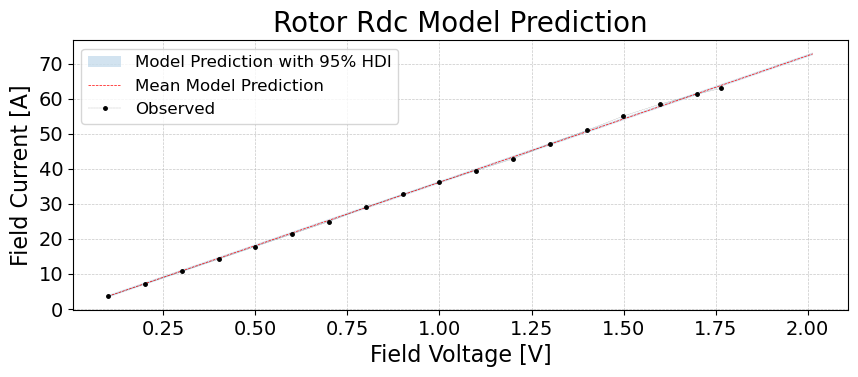

In [198]:
# Create a figure with multiple subplots (2 rows, 1 column) and set the figure size
plt.figure(figsize=(10, 3.5))
# Define the font size for tick labels
tick_font_size = 12

# Plot the OCC approach in the first subplot
plt.fill_between(I, hdi_low, hdi_high, alpha=0.2, label="Model Prediction with 95% HDI")
plt.plot(np.sort(I),np.sort(mean_prediction), color='r', lw=0.5, linestyle='--', label='Mean Model Prediction')
plt.plot(np.sort(Ia_r),np.sort(Vt_r),linestyle='--', marker='.', markersize=5, color='k', lw=0.1, label='Observed')

# Set the title and labels
plt.title('Rotor Rdc Model Prediction', fontsize=20)
plt.ylabel('Field Current [A]', fontsize=16) 
plt.xlabel('Field Voltage [V]', fontsize=16)

# Set the tick label font size for both x and y axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a legend
plt.legend(fontsize=12,loc='upper left')

# Add a grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.savefig('Rotor_RDC_pred.png', format='png', dpi=1000, bbox_inches="tight")

# Show the plot
plt.show()